In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, 
                       columns=iris.feature_names)
iris_classes = ['setosa', 'versicolor', 'virginica']

iris_df = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]

iris_features = iris_df.columns.tolist()
iris_features

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']

In [3]:
# split training (75%) and test (25%) dataset

iris_train_df = iris_df.sample(frac = 0.75, random_state = 0)
iris_train_y = iris.target[iris_train_df.index]

iris_test_df = iris_df.drop(iris_train_df.index)
iris_test_y = iris.target[iris_test_df.index]

In [4]:
# Fit the decision tree model to the iris data
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier = dt_classifier.fit(iris_train_df, iris_train_y)

In [5]:
# Make predictions for a sample iris observation
prediction = dt_classifier.predict(iris_test_df)
accuracy = dt_classifier.score(iris_test_df, iris_test_y)
conf_matrix = confusion_matrix(iris_test_y, prediction)

print(accuracy)
print(conf_matrix)

0.8947368421052632
[[12  0  0]
 [ 0 10  4]
 [ 0  0 12]]


## Decision Tree Visualization

In [6]:
# Visualize the tree as a text
tree_text = export_text(dt_classifier, feature_names=iris_features)
print(tree_text)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- sepal length (cm) <= 4.95
|   |   |   |--- class: 2
|   |   |--- sepal length (cm) >  4.95
|   |   |   |--- class: 1
|   |--- petal length (cm) >  4.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- sepal length (cm) <= 6.55
|   |   |   |   |--- class: 2
|   |   |   |--- sepal length (cm) >  6.55
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- sepal length (cm) <= 6.05
|   |   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |   |--- petal length (cm) <= 5.05
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- petal length (cm) >  5.05
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  6.05
|   |   |   |   |--- class: 2



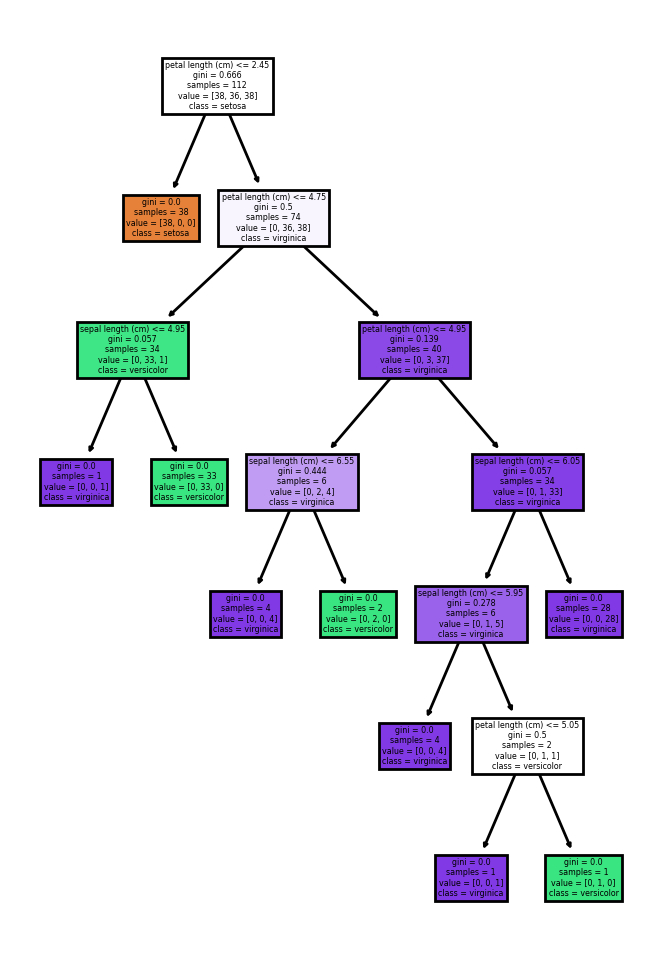

In [7]:
# Visualize the tree as a plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 6), dpi=200)
plot_tree(dt_classifier, filled=True, feature_names=iris_features, class_names=iris_classes, ax=axes)
plt.show()